**Author :** Ramaguru Radhakrishnan <br/>
**Date :** 18-April-2022 <br/>
**Description :** Simple Classification <br/>

Importing Libraries

In [106]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import random
from tensorflow import keras
from keras.layers import Dense
from tensorflow.keras.models import Sequential, Model
from sklearn.preprocessing import OrdinalEncoder
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Loading Car Dataset

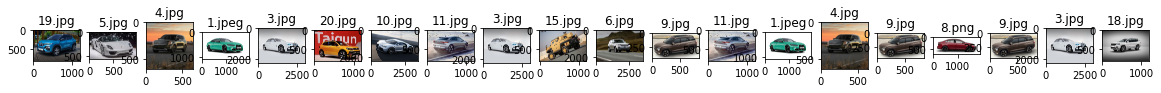

In [134]:
plt.figure(figsize=(20,20))
test_folder=r'//content//Dataset//car'
count = 20
for i in range(count):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,count,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

Loading Building Dataset

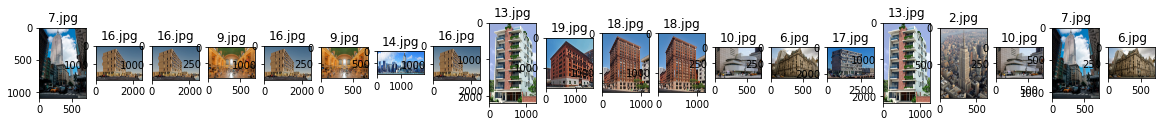

In [135]:
plt.figure(figsize=(20,20))
test_folder=r'//content//Dataset//building'
for i in range(count):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,count,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

Image Resizing Parameters

In [136]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'//content//Dataset//'

Create Dataset by Resizing the Images and converting to Float

In [138]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
    
# extract the image array and class name
img_data, class_name =create_dataset(img_folder)

In [139]:
print (img_data)

[array([[[0.10588235, 0.12941177, 0.76862746],
        [0.10196079, 0.11764706, 0.7647059 ],
        [0.31764707, 0.32941177, 0.7254902 ],
        ...,
        [0.05490196, 0.08627451, 0.6392157 ],
        [0.04705882, 0.08627451, 0.6392157 ],
        [0.04705882, 0.08627451, 0.6392157 ]],

       [[0.10196079, 0.12941177, 0.77254903],
        [0.13333334, 0.16862746, 0.6862745 ],
        [0.10196079, 0.12156863, 0.24313726],
        ...,
        [0.05490196, 0.08627451, 0.6392157 ],
        [0.04705882, 0.08627451, 0.6392157 ],
        [0.04705882, 0.08627451, 0.6392157 ]],

       [[0.09411765, 0.13333334, 0.7607843 ],
        [0.22352941, 0.25490198, 0.6784314 ],
        [0.04705882, 0.03921569, 0.07450981],
        ...,
        [0.05490196, 0.08627451, 0.6392157 ],
        [0.04705882, 0.08627451, 0.6392157 ],
        [0.04705882, 0.08627451, 0.6392157 ]],

       ...,

       [[0.63529414, 0.68235296, 0.7764706 ],
        [0.6392157 , 0.6862745 , 0.78039217],
        [0.6431373 , 

In [140]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'building': 0, 'car': 1}

In [141]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

Sequential Model

In [142]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6)
        ])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Fit the Model

In [143]:
history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=10)

Epoch 1/10
2/2 [==============================] - 1s 96ms/step - loss: 5.7979 - accuracy: 0.3000
Epoch 2/10
2/2 [==============================] - 0s 97ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 0s 103ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 0s 94ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 0s 102ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6/10
2/2 [==============================] - 0s 95ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 99ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 8/10
2/2 [==============================] - 0s 105ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 9/10
2/2 [==============================] - 0s 95ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 10/10
2/2 [==============================] - 0s 93ms/step - loss: 0.6931 - accuracy: 0.5000


Test Data

In [146]:
test_image = []
#image_path = r'/content/Dataset/car/1.jpeg'
#image_path = r'/content/Dataset/building/1.jpeg'
#image_path =r'/content/test1.png'
image_path =r'/content/test.jpg'
image=cv2.imread(image_path, cv2.COLOR_BGR2RGB)
image=cv2.resize(image, (IMG_HEIGHT,IMG_WIDTH),interpolation = cv2.INTER_AREA)
image=np.array(image)
image = image.astype('float32')
image /= 255 
test_image.append(image)
test = np.array(test_image)

In [148]:
prediction = model.predict(test)
prediction.argmax()

0